In [1]:
# Part 1 Data Preprocessing

#Importing the Libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset = pd.read_csv("sonar.csv", header=None)
np.random.seed(42)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Part 2 - Building an ANN

#Importing the Libraries
import tensorflow as tf
from tensorflow import keras

In [9]:
classifier = tf.keras.Sequential([tf.keras.layers.Dense(units = 32, kernel_initializer = 'uniform', activation = tf.nn.relu, input_dim = 60),
                                 tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Dense(units = 32, kernel_initializer = 'uniform', activation = tf.nn.relu),
                                 tf.keras.layers.Dropout(0.1),
                                 tf.keras.layers.Dense(units = 1, kernel_initializer = 'uniform', activation = tf.nn.sigmoid)])

                                  
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=classifier.fit(X_train ,Y_train ,validation_data = (X_test, Y_test),batch_size=10 ,epochs=100, shuffle = True)

Train on 156 samples, validate on 52 samples
Epoch 1/100
156/156 [==============================] - 1s 3ms/sample - loss: 0.6925 - accuracy: 0.6154 - val_loss: 0.6897 - val_accuracy: 0.8462
Epoch 2/100
156/156 [==============================] - 0s 313us/sample - loss: 0.6878 - accuracy: 0.7244 - val_loss: 0.6777 - val_accuracy: 0.8077
Epoch 3/100
156/156 [==============================] - 0s 313us/sample - loss: 0.6703 - accuracy: 0.7821 - val_loss: 0.6387 - val_accuracy: 0.8269
Epoch 4/100
156/156 [==============================] - 0s 320us/sample - loss: 0.6182 - accuracy: 0.7756 - val_loss: 0.5490 - val_accuracy: 0.8077
Epoch 5/100
156/156 [==============================] - 0s 300us/sample - loss: 0.5338 - accuracy: 0.8141 - val_loss: 0.4316 - val_accuracy: 0.8269
Epoch 6/100
156/156 [==============================] - 0s 281us/sample - loss: 0.4288 - accuracy: 0.8397 - val_loss: 0.3389 - val_accuracy: 0.8269
Epoch 7/100
156/156 [==============================] - 0s 294us/sample - lo

In [10]:
y_pred = classifier.predict_classes(X_test)
print(y_pred)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [11]:
Y_test


array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0])

In [19]:
for i in range(len(y_pred)):
    if y_pred[i] == 1:
        print("Rock")
    else:
        print("Metal")
        

Metal
Rock
Rock
Rock
Rock
Rock
Metal
Metal
Rock
Metal
Metal
Rock
Metal
Metal
Metal
Metal
Metal
Metal
Rock
Rock
Metal
Metal
Metal
Metal
Rock
Rock
Rock
Metal
Metal
Metal
Metal
Rock
Rock
Metal
Metal
Metal
Metal
Metal
Metal
Metal
Rock
Rock
Rock
Metal
Rock
Rock
Metal
Metal
Rock
Rock
Rock
Metal


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:" + str(accuracy_score(y_pred, Y_test)))
print("Classification_report:\n" + str(classification_report(y_pred, Y_test)))
print("Confusion Matrix:\n" + str(confusion_matrix(y_pred, Y_test)))


Accuracy:0.9230769230769231
Classification_report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.91      0.91      0.91        22

    accuracy                           0.92        52
   macro avg       0.92      0.92      0.92        52
weighted avg       0.92      0.92      0.92        52

Confusion Matrix:
[[28  2]
 [ 2 20]]


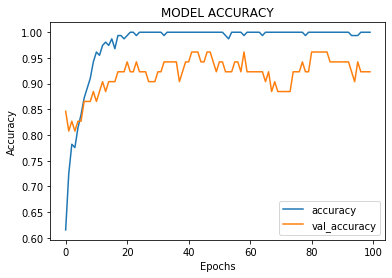

In [14]:
#Part 3 Visualisation 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MODEL ACCURACY')
plt.legend(['accuracy','val_accuracy'], loc='best')
plt.show()

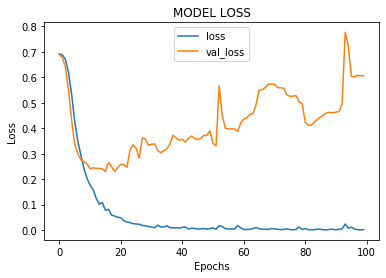

In [15]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MODEL LOSS')
plt.legend(['loss','val_loss'], loc='best')
plt.show()